### 2. The result of mixing all the labels and images of the Original-Expression-Roboflow dataset and then splitting the dataset according to 7:2:1.

#### The following code output shows the detailed results for each subset. It can be noticed that the issue regarding missing samples in the validation and test sets has been resolved. But the sample size of the training set is still not sufficient.

In [1]:
import os
import matplotlib.pyplot as plt

def analyze_yolo_dataset_total(dataset_path, dataset_name):
    emotions = ['anger', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    emotion_counts = {emotion: 0 for emotion in emotions}

    txt_file_count = 0

    for root, _, files in os.walk(dataset_path):
        for file_name in files:
            if file_name.endswith('.txt'):
                txt_file_count += 1 
                txt_file_path = os.path.join(root, file_name)
                
                try:
                    with open(txt_file_path, 'r') as file:
                        lines = file.readlines()   
                        for line in lines:
                            emotion_id = int(line.split()[0])
                            emotion = emotions[emotion_id]
                            emotion_counts[emotion] += 1
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")
                    continue

    for emotion, count in emotion_counts.items():
        print(f'{emotion}: {count} instances')

    print(f'Total number of txt files read: {txt_file_count}')

    plt.figure(figsize=(10, 6))
    plt.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Emotions in {dataset_name}')
    plt.axis('equal') 
    plt.show()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Number of Instances')
    plt.title(f'Number of Instances for Each Emotion in {dataset_name}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.show()

anger: 896 instances
fear: 487 instances
happy: 1103 instances
neutral: 511 instances
sad: 797 instances
surprise: 152 instances
Total number of txt files read: 775


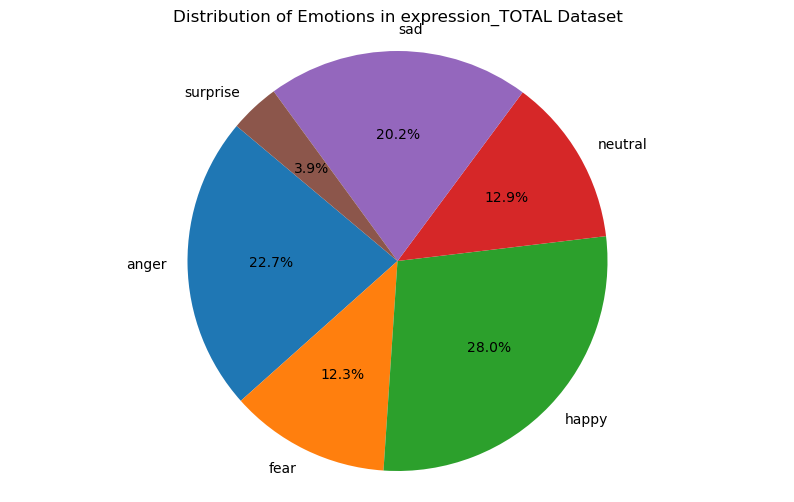

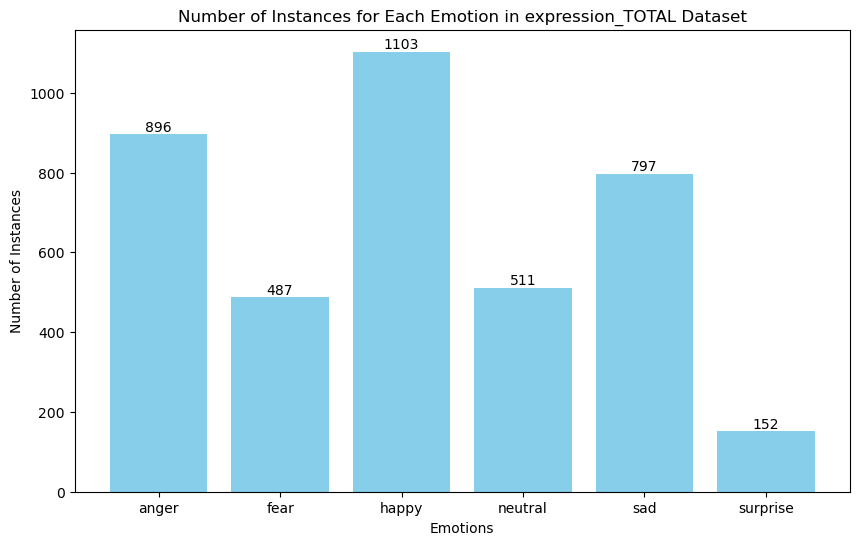

In [3]:
# TOTAL
dataset_path = '/Users/piglet/Desktop/expression/*expression(721)'
dataset_name = 'expression_TOTAL Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

anger: 586 instances
fear: 313 instances
happy: 750 instances
neutral: 367 instances
sad: 511 instances
surprise: 115 instances
Total number of txt files read: 542


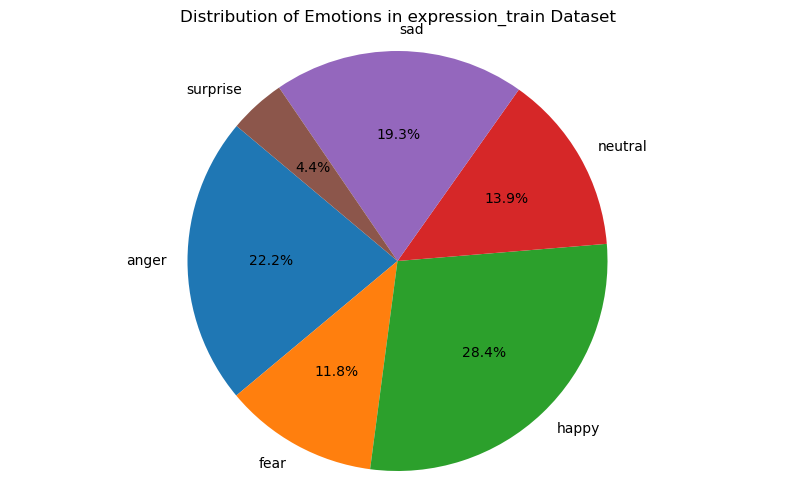

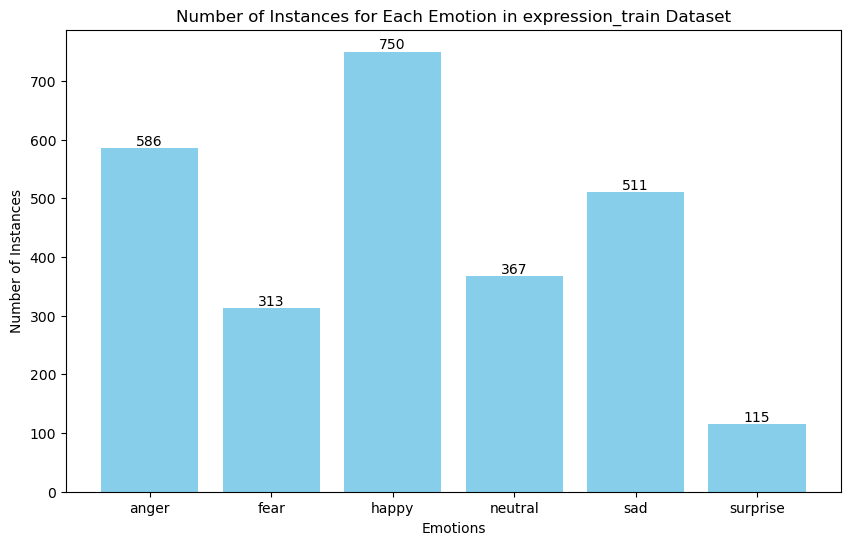

In [4]:
# train
dataset_path = '/Users/piglet/Desktop/expression/*expression(721)/train'
dataset_name = 'expression_train Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

anger: 202 instances
fear: 109 instances
happy: 252 instances
neutral: 82 instances
sad: 195 instances
surprise: 20 instances
Total number of txt files read: 155


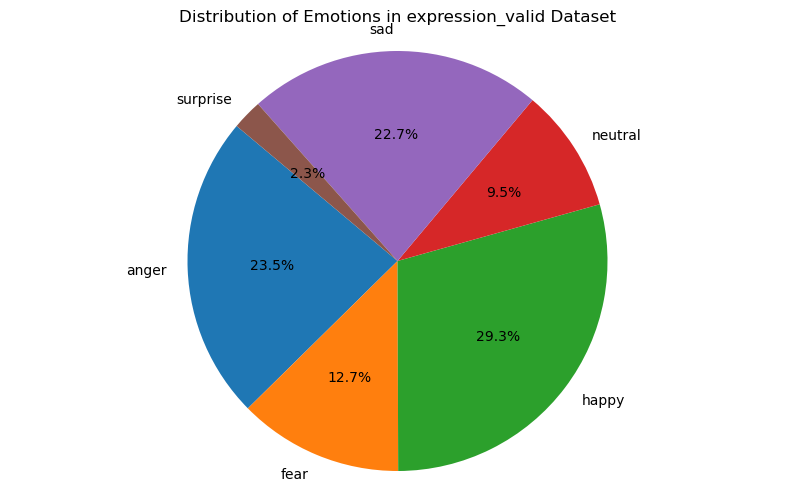

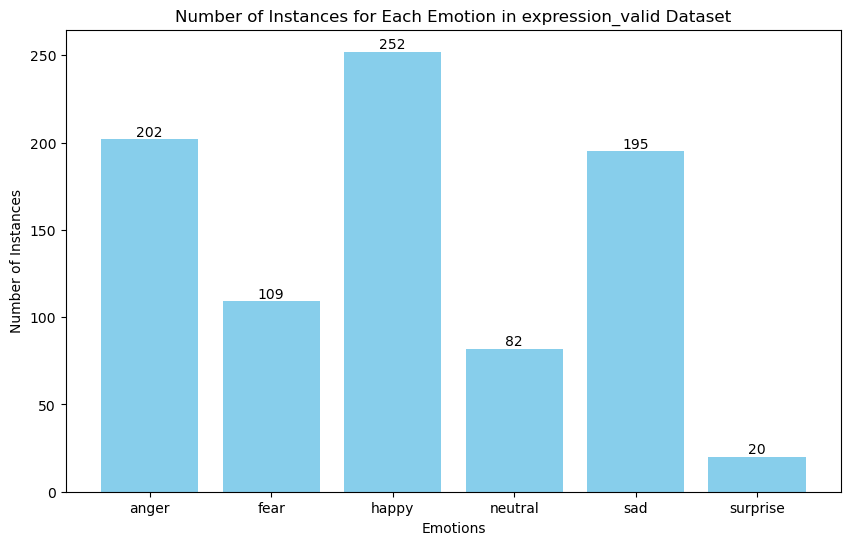

In [5]:
# valid
dataset_path = '/Users/piglet/Desktop/expression/*expression(721)/valid'
dataset_name = 'expression_valid Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

anger: 108 instances
fear: 65 instances
happy: 101 instances
neutral: 62 instances
sad: 91 instances
surprise: 17 instances
Total number of txt files read: 78


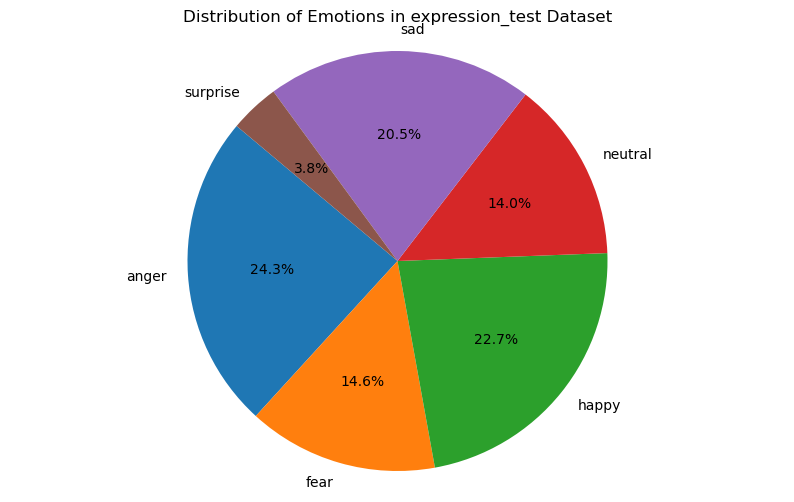

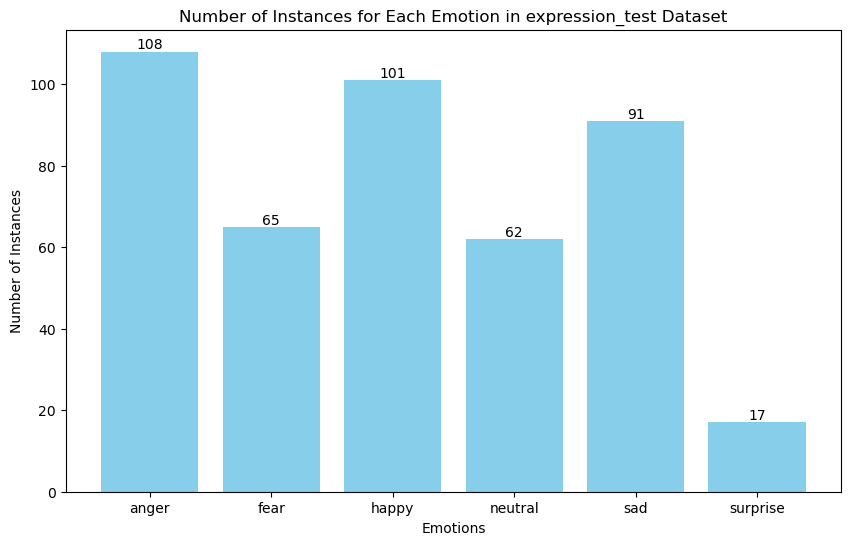

In [6]:
# test
dataset_path = '/Users/piglet/Desktop/expression/*expression(721)/test'
dataset_name = 'expression_test Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)